<a href="https://colab.research.google.com/github/rushikeshnaik779/HiggsBoson/blob/main/EDA_for_HiggsBoson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')
sns.set()

In [ ]:
!pip install kaggle
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  


Saving kaggle (1).json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 65 bytes


In [ ]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c higgs-boson

  0% 0.00/3.15k [00:00<?, ?B/s]
100% 3.15k/3.15k [00:00<00:00, 6.51MB/s]
 86% 30.0M/34.8M [00:00<00:00, 57.9MB/s]
100% 34.8M/34.8M [00:00<00:00, 87.8MB/s]
  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 149MB/s]
 83% 14.0M/16.9M [00:00<00:00, 144MB/s]
100% 16.9M/16.9M [00:00<00:00, 145MB/s]


In [ ]:
import zipfile 
# 
zip_ref = zipfile.ZipFile("training.zip", "r")
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile("test.zip", "r")
zip_ref.extractall()
zip_ref.close()

# EDA 
## Let's import the data and take a look at it 


In [ ]:
import pandas as pd 

training = pd.read_csv("training.csv")
training.sample(10)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
10443,110443,163.716,42.021,107.446,110.007,2.439,226.595,1.281,2.689,40.326,253.490,1.961,0.228,0.582,22.392,-1.803,-1.672,43.911,0.767,-2.463,65.868,3.018,300.022,3,88.631,2.884,1.147,53.210,0.444,-0.012,187.187,1.399441,b
8662,108662,106.403,29.111,80.642,106.486,1.792,109.580,4.706,2.186,3.997,221.626,4.326,1.366,0.584,21.142,1.122,-0.979,91.462,1.690,-3.090,25.374,-2.476,334.106,2,72.468,1.451,0.310,36.554,3.243,0.574,109.022,2.322288,b
55488,155488,115.182,50.904,85.161,68.415,4.086,438.117,-4.171,2.451,35.408,205.012,2.504,1.204,0.304,22.007,0.609,1.203,55.116,2.288,-0.583,24.099,0.963,325.809,2,95.076,2.101,2.946,32.813,-1.985,0.194,127.889,0.018636,s
226579,326579,100.265,1.058,73.222,6.263,-999.000,-999.000,-999.000,3.005,6.263,73.108,0.722,0.349,-999.000,42.448,0.419,1.131,30.660,0.795,-2.171,10.210,-2.111,91.654,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.018636,s
78743,178743,-999.000,68.895,70.130,18.248,-999.000,-999.000,-999.000,2.662,18.248,58.163,1.396,-1.412,-999.000,24.274,0.169,-0.504,33.888,-1.361,1.674,45.054,-2.451,158.080,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.357691,b
126252,226252,102.512,43.005,78.778,6.903,-999.000,-999.000,-999.000,3.067,6.903,63.861,1.567,-1.400,-999.000,24.874,-2.037,2.587,38.987,-0.562,-0.102,13.932,-2.451,147.608,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.001502,s
214627,314627,642.457,62.453,450.239,36.341,1.155,184.542,-0.300,4.480,25.280,350.775,0.521,-1.411,0.000,107.042,-1.157,2.159,55.796,2.308,-1.286,47.799,0.013,475.575,3,87.012,0.761,-0.912,69.915,-0.394,2.254,187.936,1.187899,b
26471,126471,151.340,37.386,94.806,74.383,-999.000,-999.000,-999.000,2.410,23.474,170.897,0.990,1.403,-999.000,50.429,-0.734,-2.752,49.913,-1.071,-0.366,38.345,-1.249,288.613,1,70.555,-0.570,1.412,-999.000,-999.000,-999.000,70.555,0.018636,s
69340,169340,-999.000,100.759,35.463,26.989,-999.000,-999.000,-999.000,1.211,26.989,61.106,1.910,-0.790,-999.000,20.995,-1.402,-0.746,40.110,-2.296,-1.563,63.701,1.415,130.133,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,2.291095,b
145582,245582,184.219,68.227,149.042,25.442,-999.000,-999.000,-999.000,3.325,45.230,118.077,1.879,-1.365,-999.000,26.375,-1.441,2.093,49.564,1.362,-2.402,25.477,0.172,152.844,1,42.138,-1.293,1.640,-999.000,-999.000,-999.000,42.138,2.931230,b


In [ ]:
test = pd.read_csv("test.csv")
test.sample(5)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
6047,356047,-999.000,82.286,84.455,5.588,-999.00,-999.000,-999.000,2.220,5.588,64.202,0.927,-1.412,-999.000,33.321,0.850,0.174,30.881,-1.285,0.783,55.953,-2.645,152.825,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
283919,633919,64.655,74.712,48.851,73.961,-999.00,-999.000,-999.000,1.385,30.112,129.824,0.990,-0.088,-999.000,36.453,1.984,-0.567,36.072,1.200,-1.708,47.809,0.530,239.245,1,57.300,0.909,3.094,-999.000,-999.000,-999.000,57.300
289470,639470,242.430,125.520,122.265,6.743,-999.00,-999.000,-999.000,3.343,6.743,113.229,2.762,-1.379,-999.000,30.096,0.498,2.773,83.132,1.809,-0.435,47.528,2.595,189.342,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
340239,690239,148.258,9.418,78.402,70.260,-999.00,-999.000,-999.000,2.219,70.260,90.100,0.570,0.666,-999.000,57.388,-0.919,0.638,32.712,-1.240,-1.558,63.991,-1.764,295.344,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
429481,779481,84.393,56.565,57.530,111.872,3.21,337.884,-2.129,1.546,9.619,258.138,3.189,1.317,0.637,22.586,-0.071,1.208,72.020,0.410,2.677,42.456,1.603,262.900,2,129.693,0.937,-0.699,33.839,-2.273,-2.883,163.532


In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [ ]:
training.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


# Basic Variable description given 

* all variables are floating point, except PRI_jet_num which is integer
* variables prefixed with PRI (for PRImitives) are “raw” quantities about the bunch collision as
measured by the detector.
* variables prefixed with DER (for DERived) are quantities computed from the primitive features,
which were selected by the physicists of ATLAS
* it can happen that for some entries some variables are meaningless or cannot be computed; in
this case, their value is −999.0, which is outside the normal range of all variables

# let's see labels or y values 

* we have two things to predict here 
    1. Weight 
    2. Label 



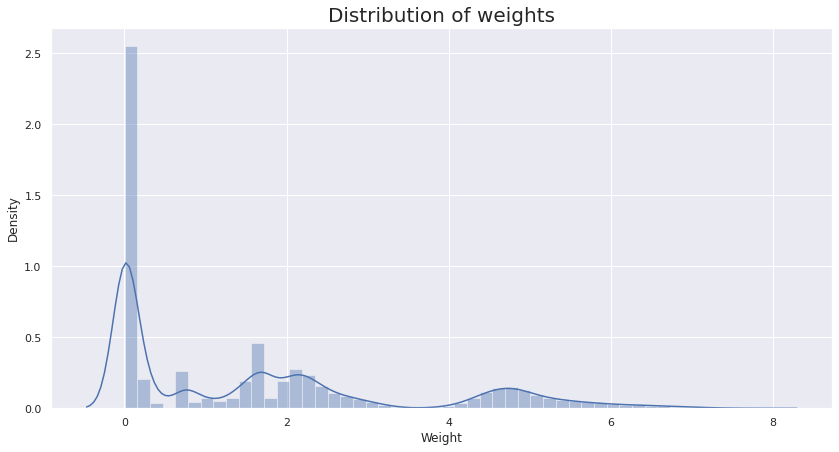

In [ ]:
# Distribution of weight 
plt.subplots(1,1, figsize=(14, 7))
sns.distplot(training.Weight)
plt.title('Distribution of weights', size=20)
plt.show()

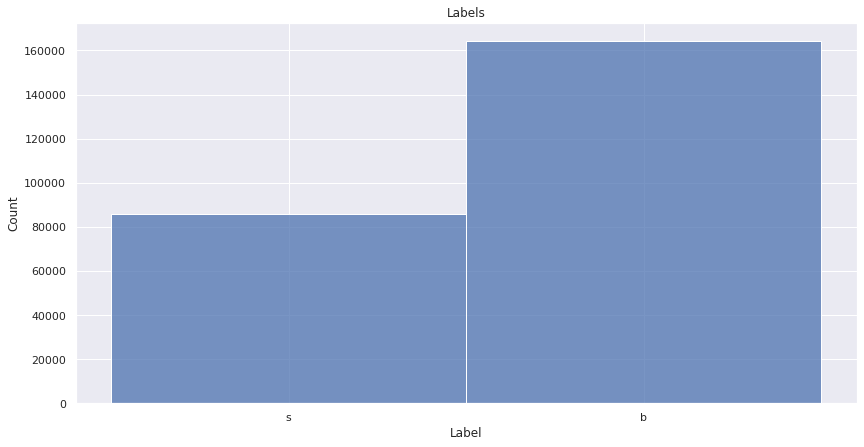

In [ ]:
# let value count and distribition of labels 
plt.subplots(1, 1, figsize=(14, 7))
sns.histplot(training.Label)
plt.title('Labels')
plt.show()

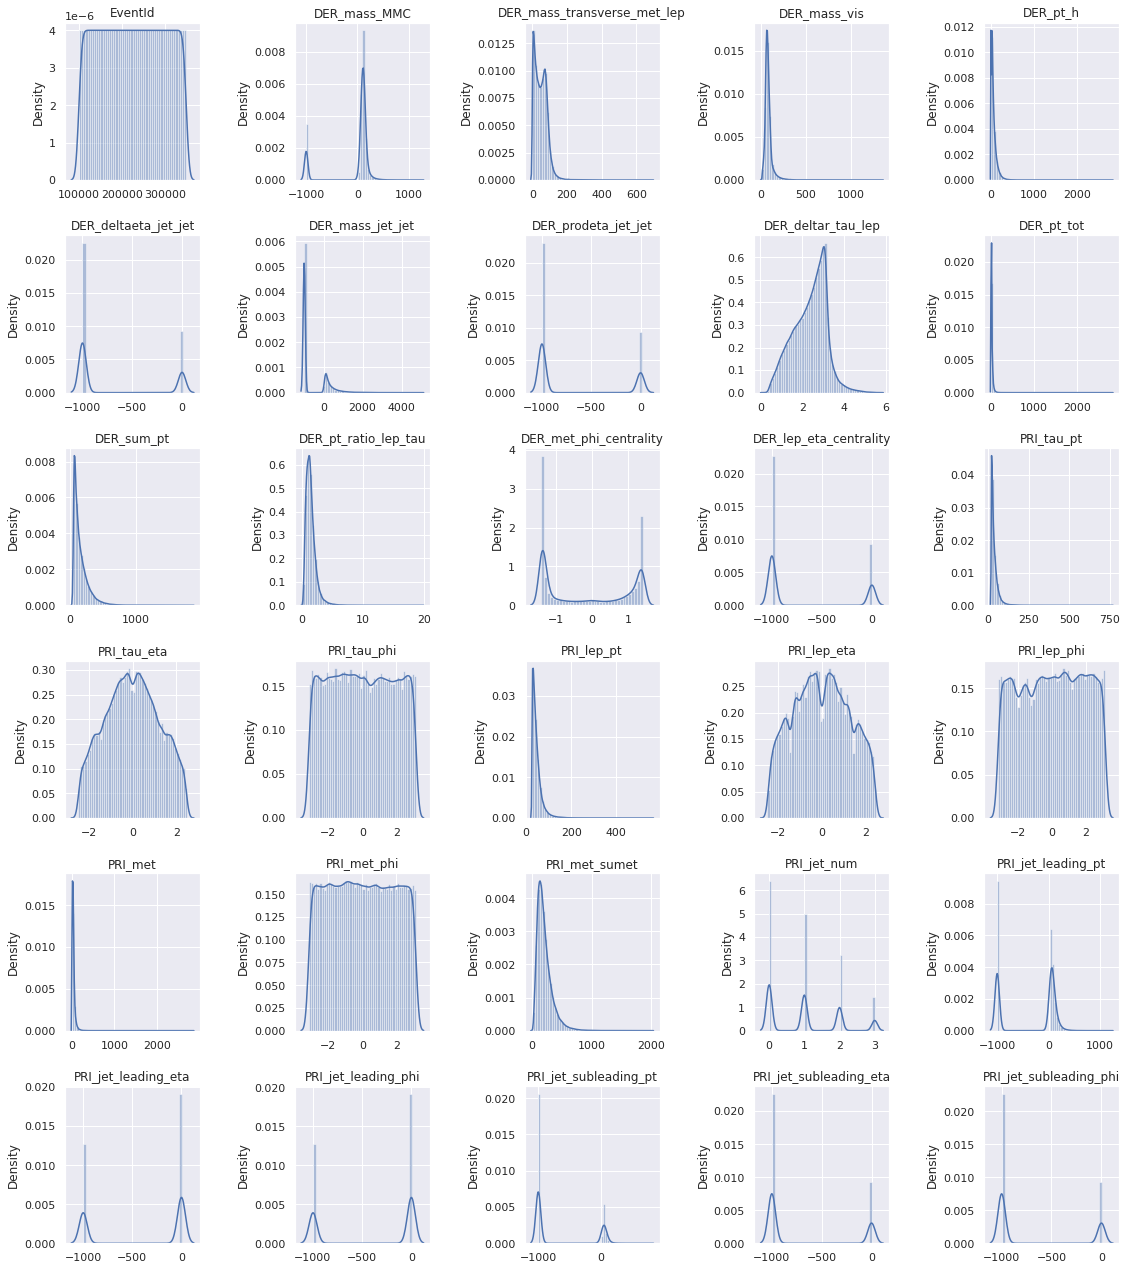

In [ ]:
fig, ax = plt.subplots(6,5, figsize=(16, 18))
ax = ax.flatten()
for i in range(30):
    sns.distplot(training.iloc[:,i].values, ax=ax[i])
    ax[i].set_title(training.columns[i])
fig.tight_layout(pad=2.0) 

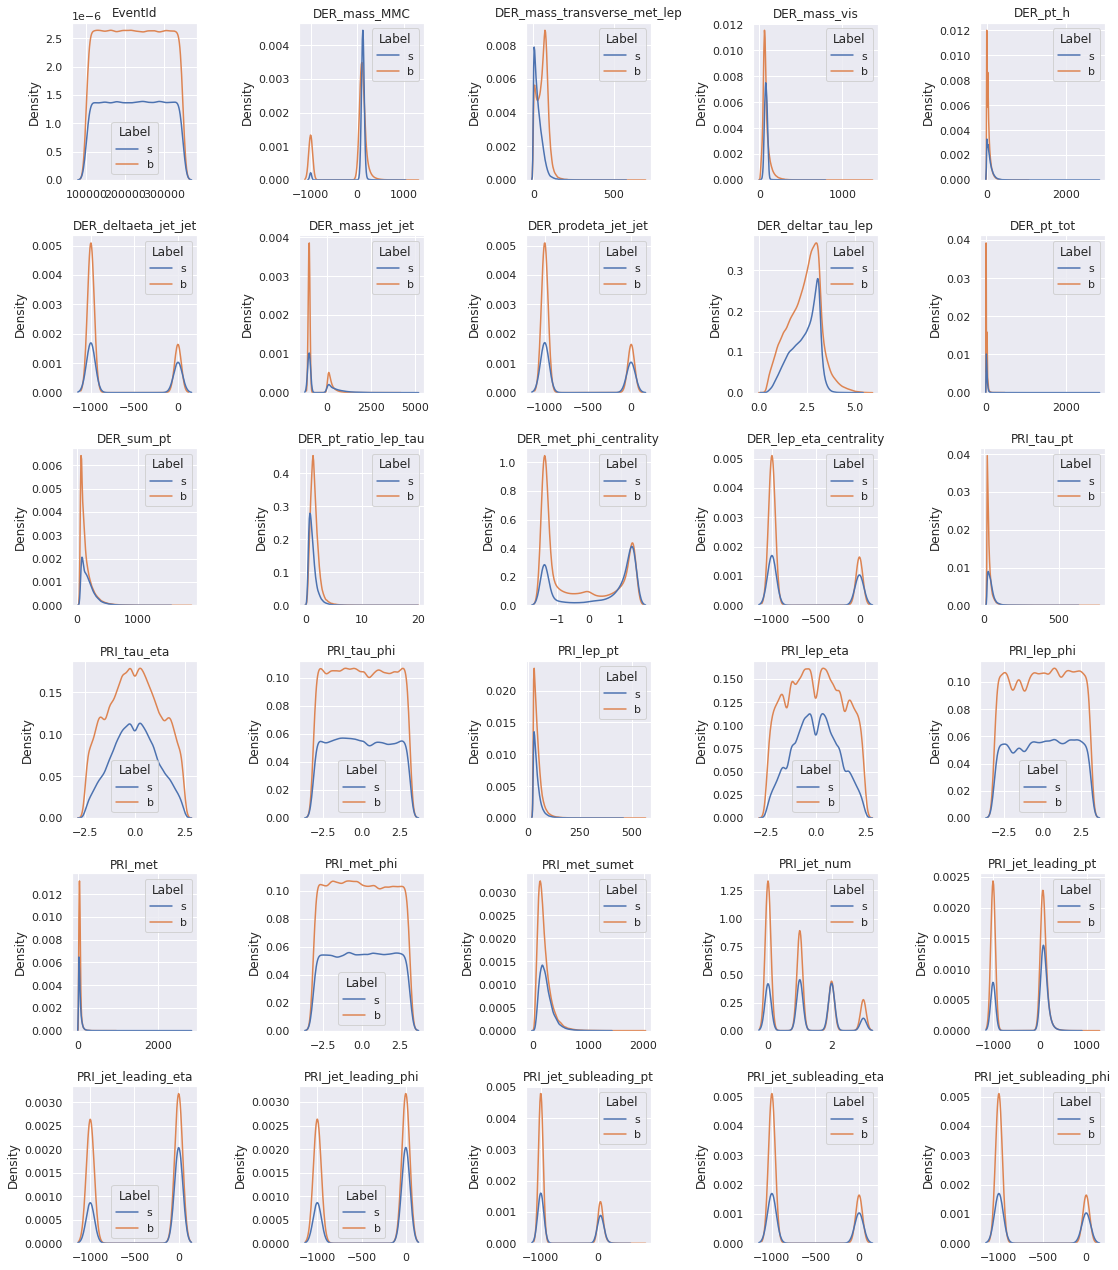

In [ ]:
fig, ax = plt.subplots(6,5, figsize=(16, 18))
ax = ax.flatten()
for i in range(30):
    sns.kdeplot(training.iloc[:,i].values, ax=ax[i], hue=training.Label)
    ax[i].set_title(training.columns[i])
fig.tight_layout(pad=2.0) 

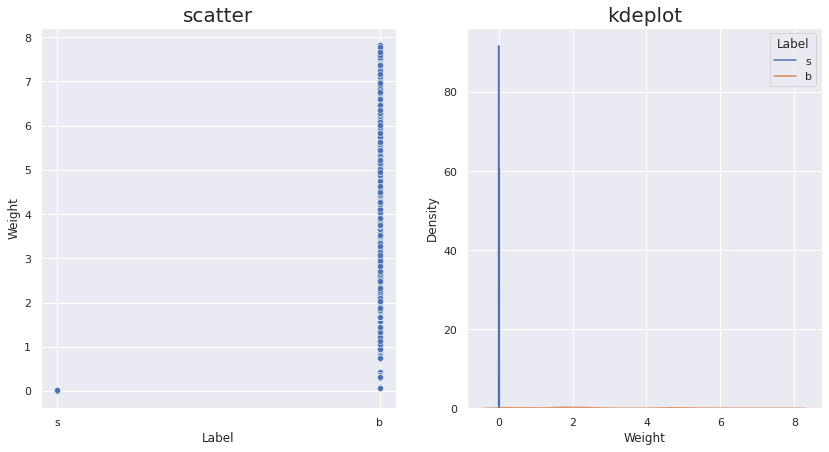

In [ ]:
# let's have a look at weight and label relation 

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.scatterplot(training.Label, training.Weight, ax=ax[0])
sns.kdeplot(training.Weight, hue=training.Label, ax=ax[1])
ax[0].set_title('scatter', size=20)
ax[1].set_title('kdeplot', size=20)
plt.show()

In [ ]:
# let's check how many values per feature are there which are out of range

def check_999(x):
    return int(x) == -999

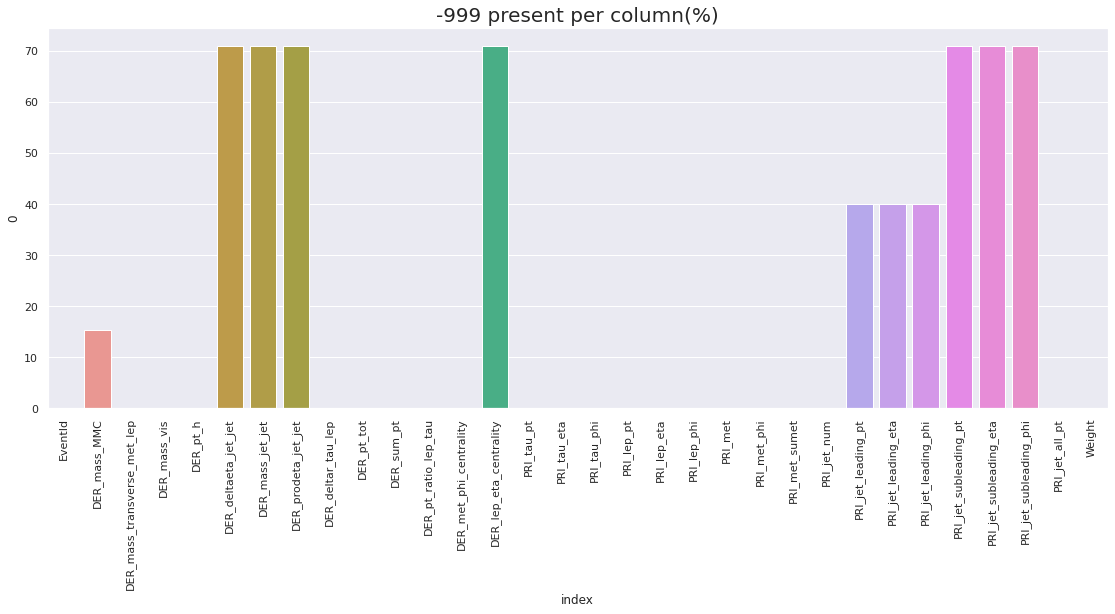

In [ ]:
df = pd.DataFrame()

for col in training: 
    if col != 'Label':
        df[col] = training[col].apply(check_999)
df = pd.DataFrame((df.sum()/training.shape[0])*100).reset_index()
fig, ax = plt.subplots(1,1, figsize=(19, 7))
sns.barplot(data=df, x='index', y=0)
ax.set_title('-999 present per column(%)', size=20)
#ax.set_xticks(df.index.values, rotation=90)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()
